# Motivation + Outcomes

<img src = "https://media.discordapp.net/attachments/512105532283158540/1365634527770181642/AngstyMagicMoodboard.jpg?ex=680e05c3&is=680cb443&hm=3af715a4a35e93ad829c3348109947c95b54177f007dbd2cf6b0b7b08515d67b&=&format=webp&width=1200&height=675">
<p><i>An example mood board, created from Pinterest images by hand</i></p>



**MOTIVATION:**

Our tutorial will take you through the steps of making a mood board using Python. We will first get the actual images and then teach how to lay them out in a mood board.

In product development, mood boards are effective ways of capturing a tone, ideating, and evoking an emotional response from the viewer. If you are going into any design or production field in the work place, mood boards can be a useful way to conceptualize your ideas and share them with others in a comprehensive way.

However, mood boards can get complicated quick! Each mood board needs its own concepts and motif. Through data scraping and image manipulation, we can use Python to automate parts of the mood board making process, and prevent the endless doomscroll searching for the perfect image or crop.

For this tutorial, we pull from Pinterest, a website that's great for sharing high-quality and thought-provoking images!

**OUTCOMES:**

Mood Board Skills:
- Engineering searches on Pinterest
- Manipulating layouts, filters, and images to best present a project goal visually

Technical Skills:
- Data Scraping and best practices
- Image manipulation using a computer vision library, OpenCV

Before we get started, let's make sure to import each library we want to use!

In [ ]:
import os
import requests
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt

import random

# Part 1: Image Downloading

Tasks:

- Explain how to get a proper image link using inspect

- Explain how to download an image from its link using the request library in Python

If you go to <a href="pinterest.com">Pinterest.com</a>, click "Explore", and then type in a search, you will get something like the image below. Whether or not you are signed in may change the results, but the general format should be the same: Your search term on top with the relevant images found below.

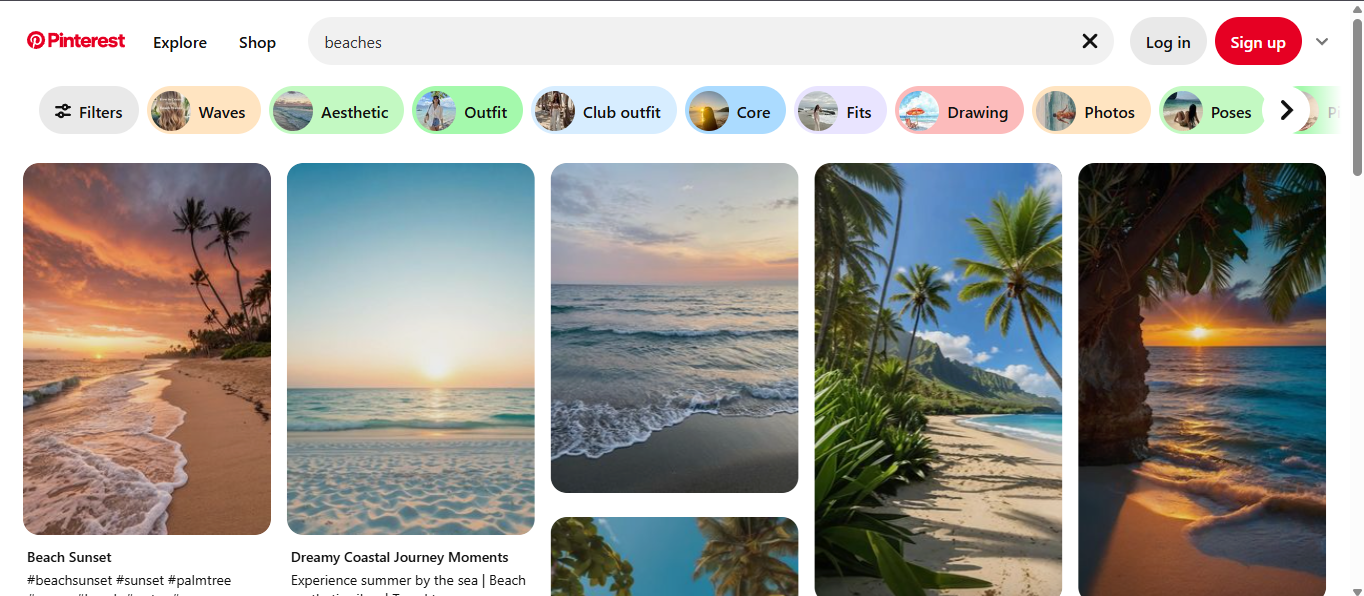

Now if you right-click anywhere on the screen, you should get the option to click "Inspect" if you are in a Chrome browser, "Inspect Element" if you are using Safari, or any other similar term for whatever browser you are using. 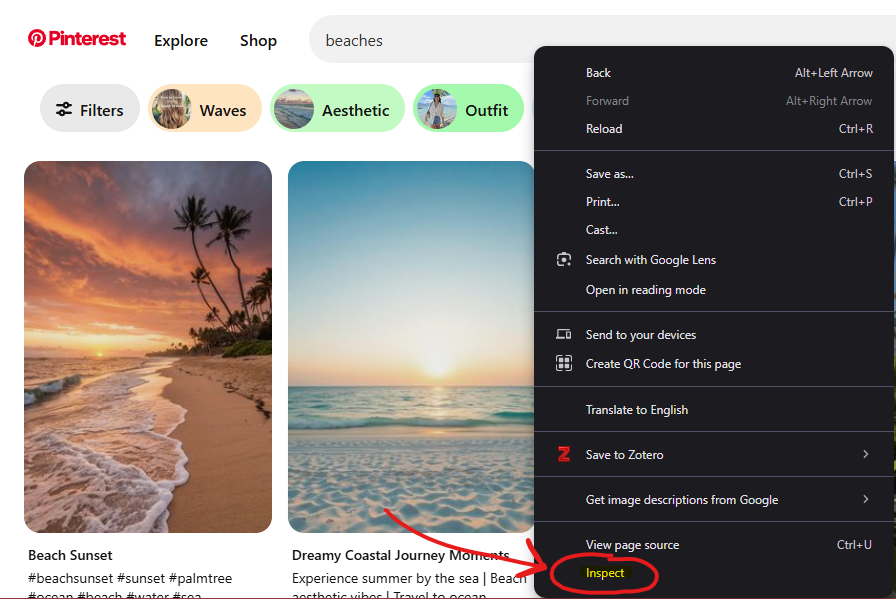

Upon clicking that button, you should get a window on the right of your screen, similar to the screenshot below. We will be focusing on the "Elements" tab, which contains the HTML source code for the webpage. HTML stands for HyperText Markup Language, a language used to ["define the content and structure of web content"](https://en.wikipedia.org/wiki/HTML). In Inspect mode, you can scroll through the source code and highlight the content which correspond to certain tags.

For example, we can see below that the highlighted \<img\> tag corresponds to the highlighted image in the search results, and the tag stores the alt text and src link for the image.

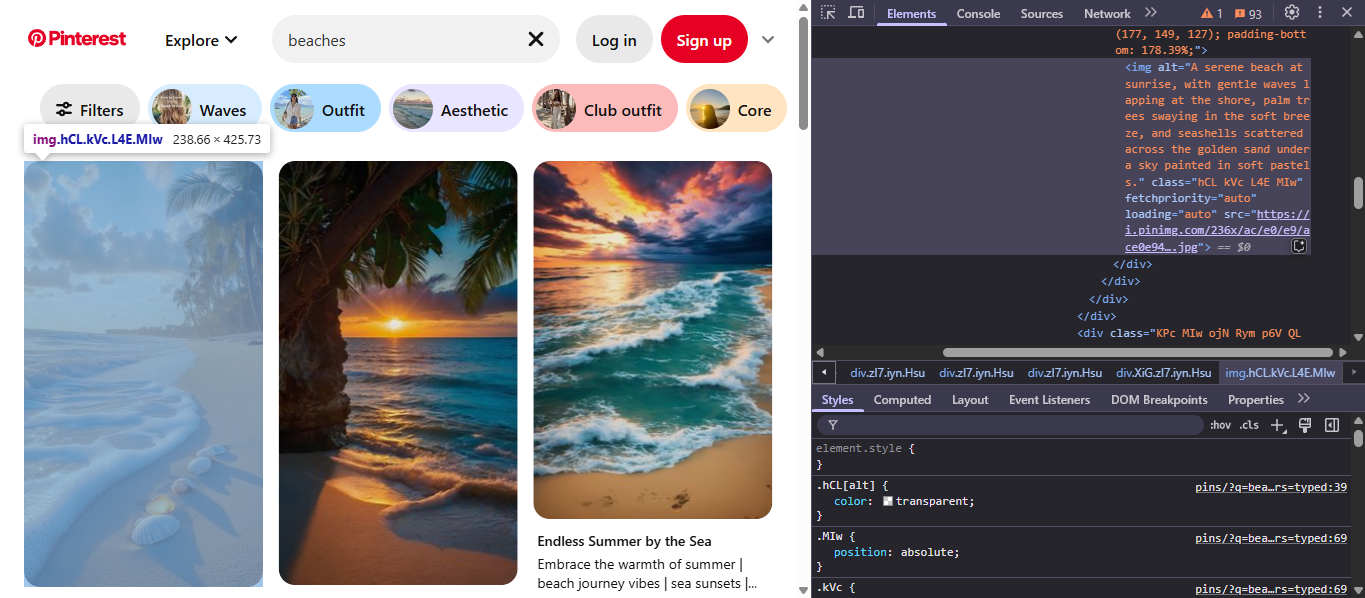

Perfect! The src link for the image is exactly what we need to download it.

Now you try! You can go ahead to Pinterest.com and find an image you would want in your desired mood board, then follow the same inspect steps we did to find the proper link to paste where indicated below.

*Note: Really make sure you follow the same steps!! We will discuss in the next section why just taking any link won't work. Inspect and find the \<img\> tag, then find the src attribute containing a link in the "i.pinimg.com" format. It may take lots of unnesting, but trust the process.*

In [ ]:
# insired by https://medium.com/@obaff/pinterest-image-downloader-using-python-beautifulsoup-requests-and-playwright-bf6469028bef

# Make a folder to keep our images
path = '/content/media/'
if not os.path.exists(path):
    os.makedirs(path)

def downloadSpecificImages (imageLink):
  """
  Given a Pinterest image link, add those to the media folder
  In: String, the Pinterest image link in the form https://i.pinimg.com/.../.jpg
  Out: None
  """
  # Format the image link
  imageName = imageLink.strip('https://i.pinimg.com/236x/d3/4c/fc/.jpg')
  name = imageName.replace('/', '_')+'.jpg'

  # Write the image to a file using the link
  with open(os.path.join(path, name), "wb") as f:
      # get the image
      image = requests.get(imageLink)
      f.write(image.content)

# Links found on Pinterest.com
downloadSpecificImages("https://i.pinimg.com/236x/26/b5/af/26b5af88ea28db125fda9df668a719ac.jpg")
# downloadSpecificImages("paste your link here!!")

**Your turn: Uncomment the bottom line and paste your own Pinterest image link!**

What is this code doing?

First, it makes a folder to keep our image.

Then we have our function to get the image from the link, which first names the image.

Next, our function uses the Python requests library. This library makes requests to servers, which is what your computer is doing whenever you are accessing the world wide web.

More specifically, here we pass in the url "https://i.pinimg.com/236x/26/b5/af/26b5af88ea28db125fda9df668a719ac.jpg" to show we want to talk to the PinImg server, and that we want to GET the information at a specific place, specified by the numbers and letters after each slash.

We can think of each url as a house address, starting with the street name and then followed by the more specific number of the actual house we want to access.

After requesting the image, we write it in a file at our media folder.

Nice! Now if you hit the folder icon on the left toolbox of this page, you should find a new "media" folder within "contents", and your downloaded image(s) should be contained there.

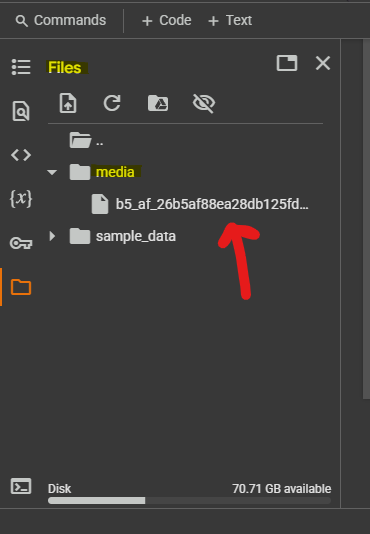

# Part 2: Getting Images via Scraper

Tasks

- Explain how selenium works to get a link in code

- Quick aside on data scraping and ethics

- Explain best practices for finding images for a mood board

Now that we know how to download images from a link, how can we do it using code rather than having to actually grab the link from the website?

Is there a way to use the requests library to get the source code of a page rather than an image? Let's try it!

In [ ]:
# get source code of "beaches" search page
request = requests.get("https://www.pinterest.com/search/pins/?q=beaches&rs=typed")

print(request.content)

b'<!DOCTYPE html><html class="en" lang="en"><head><meta charSet="utf-8"/><meta content="width=device-width, initial-scale=1" id="viewport" name="viewport"/><meta content="AobcHP0Riuw7qx+GcJ79jLXxzvz+vbYglMh02KHK8du7LYn9e2JLytVX5ABrS3PMoEeAZ5HxTvNW05uVVfni5gEAAAByeyJvcmlnaW4iOiJodHRwczovL3BpbnRlcmVzdC5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcxNjk0MDc5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="Av4cdNV5Ac7XSEISAEd4RrmKRM2TMvndpFUm8P74JPncnhjJ0OwXtBxVwvFj7RmITn74iYqF1Vw7p6XF7b1zEwkAAAB9eyJvcmlnaW4iOiJodHRwczovL3BpbnRlcmVzdC5jb206NDQzIiwiZmVhdHVyZSI6IlNlcnZpY2VXb3JrZXJTdGF0aWNSb3V0ZXJUaW1pbmdJbmZvIiwiZXhwaXJ5IjoxNzUzMTQyNDAwLCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="default-src &#x27;self&#x27; blob: s.pinimg.com; font-src &#x27;self&#x27; m.media-amazon.com *.amazon-adsystem.com s.pinimg.com data: fonts.googleapis.com fonts.gstatic.com use.typekit.net; style-src &#x27;self&#x27; blob: &#x27;unsafe-

The code above is "GET"ing the source code of the search page of "beaches" on Pinterest.com.

Wow!! That really doesn't look like what we saw when we Inspected the webpage. There aren't even any image tags! What gives?

### Data Scraping Ethics!!

Turns out, Pinterest and many other huge websites have implemented safe guards to prevent developers from just scraping data from their website without going through their authentication process. If we wanted to pull tens of thousands of images from Pinterest, we would want to be mindful developers and use the [Pinterest API](https://developers.pinterest.com/docs/api/v5/introduction/) to do so, which involves asking Pinterest for an access key using a business account.

Luckily for us, we are just small people doing a small project. Our mood boards shouldn't require more than 10 images and we are not planning to make a profit using these images. We are just a small drop in the Pinterest ocean!

So how can we get around these safe guards? Luckily for us, there are useful python libraries which can pretend to be browsers, and help us get the source code in python. We are going to use one such library called [Selenium](https://www.selenium.dev/documentation/webdriver/).

**What is Selenium?**

Selenium is a scraping library that mimicks a real user better than most scrapers. It does this by imitating a real browser and runs all the Javascript. It's very slow because of this, so using it to download very large datasets is ill-advised. It could even take down the servers of smaller companies, and [DDoS attacks](https://www.cloudflare.com/learning/ddos/what-is-a-ddos-attack/) like that are felonies!

The first step is to use Selenium! Since we are in a Google Colab, we installed a special version of Selenium optimized for Colab, but the functionalities are the same!

Run the code below to install selenium and import it.

In [ ]:
# following https://pypi.org/project/google-colab-selenium/

%pip install -q google-colab-selenium


import google_colab_selenium as gs
from selenium.webdriver.common.by import By

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 29.6 MB/s eta 0:00:00


Now we can use selenium to open the webpage in a "browser" and inspect. We will get each image tag in the search feed, and input the src link from those tags into our code to download the images. Don't worry too much about the actual code we run to do that; but if you want, selenium documentation is linked in a comment!

Running this code will get us the images which show up for a search of "bright castles" , "blue stars", and "fantasy forest"; feel free to change these search terms to experiment with which will be most useful for your mood board!

In [ ]:
# following https://www.selenium.dev/documentation/webdriver/elements/finders/

path = '/content/media/'
if not os.path.exists(path):
    os.makedirs(path)

def downloadSearchedImages(search):
    """
    Given a search term, grab random relavent Pinterest images add those to the media folder
    In: String, the term to input in Pinterest search box
    Out: None
    """
    # Use selenium to open browser and get the html of the webpage
    driver = gs.Chrome() # this line is supposed to take a long time -- don't worry!
    driver.get("https://www.pinterest.com/search/pins/?q="+search+"&rs=typed")
    time.sleep(10) # Let it load :)

    # Get each image from the search feed on the page
    xpath = "//div[@data-test-id='search-feed']"
    elem = driver.find_element(By.XPATH, xpath)
    elements = elem.find_elements(By.TAG_NAME, 'img')
    print(len(elements)) # num of pictures

    # Download images, using function from Part 1
    for element in elements:
      link = element.get_attribute("src")
      downloadSpecificImages(link)

    driver.close()

# Get images
downloadSearchedImages("bright castles")
downloadSearchedImages("blue stars")
downloadSearchedImages("fantasy forest")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3


<IPython.core.display.Javascript object>

10


<IPython.core.display.Javascript object>

6


Great! Now if we check our media folder now, the images from the searches we just ran should be waiting for us. :) Feel free to open each image, delete ones which may be irrelevant, and rerun the function with edited search terms to closer cater to your mood board needs!



### But how do you know what your mood board needs?

The first criteria for our mood board images is high quality, which is why we want to use Pinterest! It is one of the largest platforms for sharing high-quality images.

As for matching your concept, it definitely varies depending on your intended vision, but generally "designers recommend a formula of two interior shots, one product shot, two landscape shots and two texture shots" ([Canva](https://www.canva.com/create/mood-boards/)). While I wouldn't recommend sticking to such strict guidelines, this quote shows that the main point of choosing images is variety! Even if you think your idea is one-dimensional, you can present any emotions you want to evoke or colors you want to include using a variety of images.

If there are particular personal photos or sketches you think would highlight your particular mood board, feel free to upload them directly into the notebook using the "Upload" icon above the files page, then move those images into our media folder.

If you are need of inspiration, below is an example mood board created for [Ursula's Lair](https://pin.it/13TeThvgN
).

**Write down answers to the following questions or discuss with a friend:**


*   What do you think were some of the motifs or emotions kept in mind when choosing each image?
*   Do you see any common themes or similarities between the images?
*   What makes each image different? Why was each individual image added to the board?

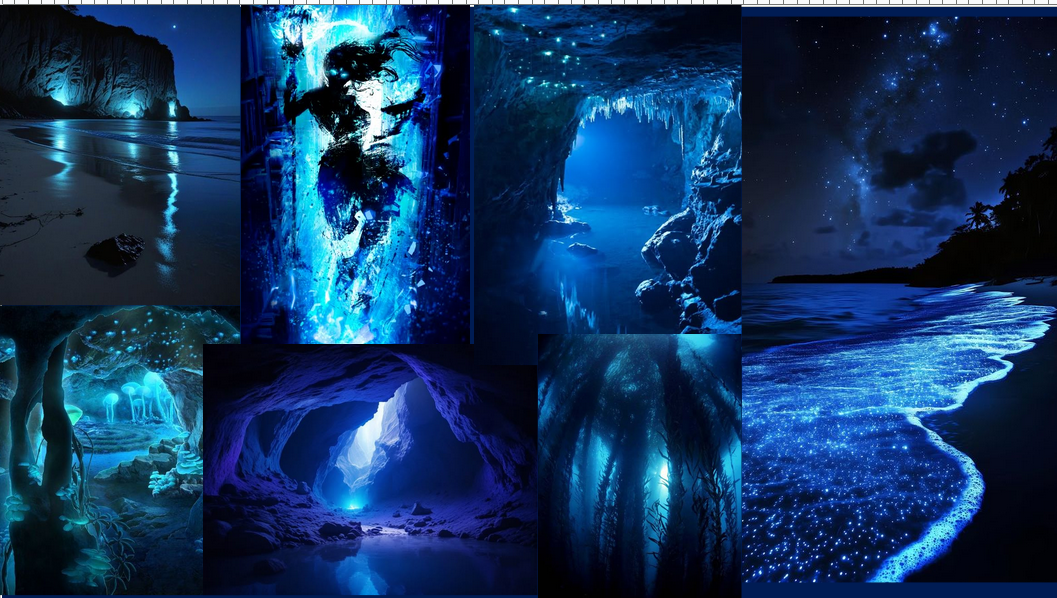

Run the code block below to see all of our downloaded images so far. Scroll through and decide which you may want to keep or delete!

Name  /content/media/1f_76_19_1f7619fe4fd49b40b65f4d4e948d2cd7.jpg


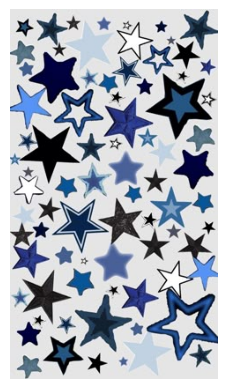

Name  /content/media/8_79_ea_4879ea5cc8cbe42ff27e3b9426641565.jpg


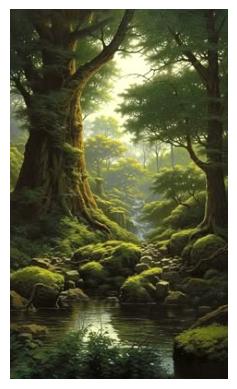

Name  /content/media/9e_f4_60_9ef460f250ba6b1860f50b9cc432b.jpg


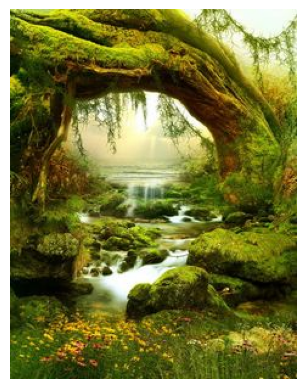

Name  /content/media/b4_92_c7_b492c704654cbba6aef0dfcdef365bc0.jpg


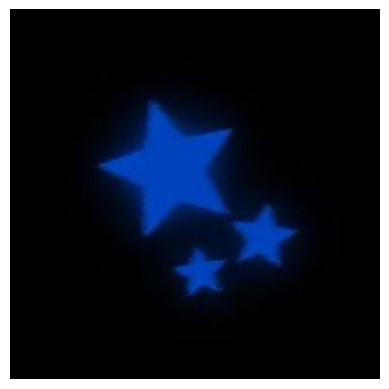

Name  /content/media/b5_af_26b5af88ea28db125fda9df668a719a.jpg


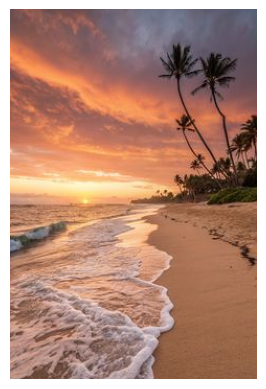

Name  /content/media/5_b0_42_f5b042e7111cf289cc7bf6ab615eded8.jpg


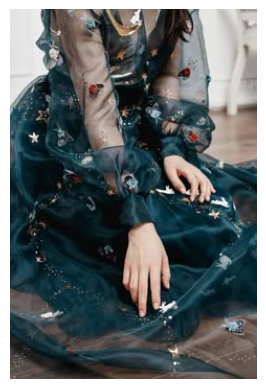

Name  /content/media/03_63_d3036325c03b3a4b511766bd40c14b.jpg


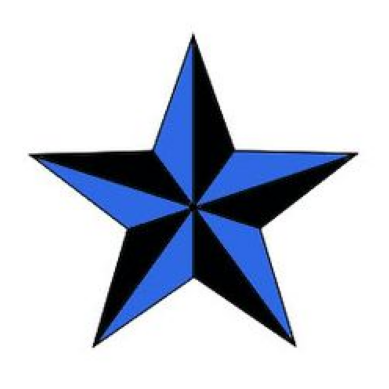

Name  /content/media/9_59_fc_2959fc13e9a4ee2834f74b4a70acf810.jpg


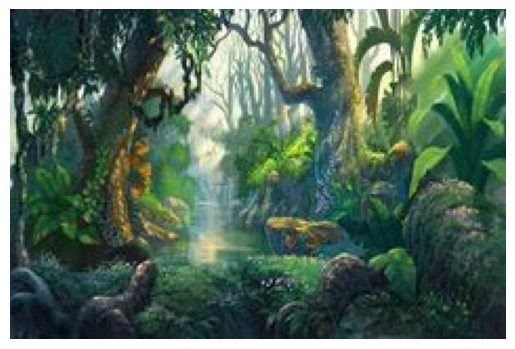

Name  /content/media/a6_d4_ba_a6d4ba0af22cb66da2e98946b9b14f65.jpg


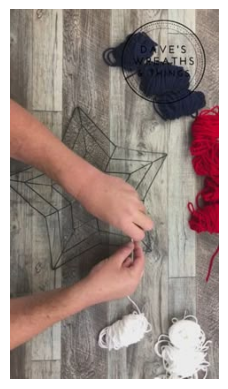

Name  /content/media/eb_6f_42_eb6f42c5cbbcbc6d142a2ababa12871.jpg


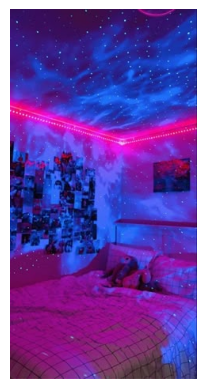

Name  /content/media/5_85_99_4585993cd4140c6c8c2f291ab7301dd7.jpg


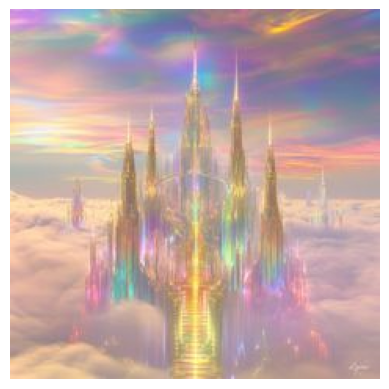

Name  /content/media/5_6e_f1_256ef1e7f0a608d85c1d2ead213115d5.jpg


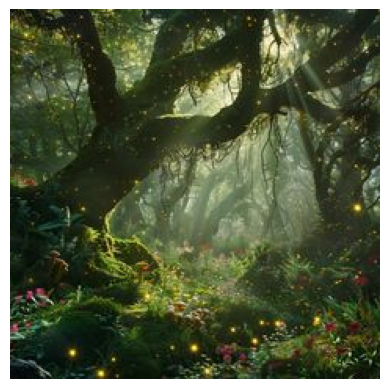

Name  /content/media/e1_e5_cde1e5bb33ea630adbf27d8cadbb488.jpg


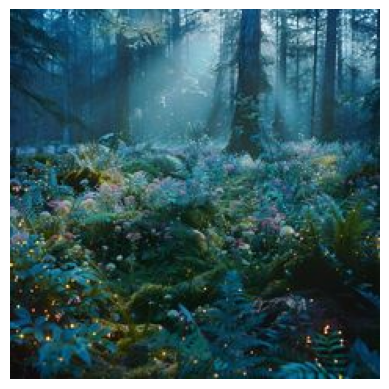

Name  /content/media/b6_16_75_b61675bd9734c31f2b95c52f73a0959.jpg


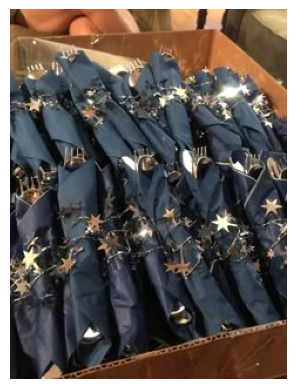

Name  /content/media/b1_a1_b2_b1a1b21cd8e6c31d484cd1e921ca820.jpg


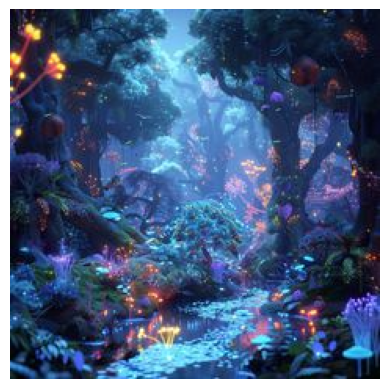

Name  /content/media/5f_18_8e_5f188e3cdeb7a4e1c77587c308eb7ad0.jpg


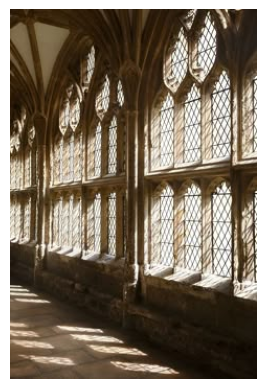

Name  /content/media/70_db_57_70db5785979a5873704e3c2b4ac08e9.jpg


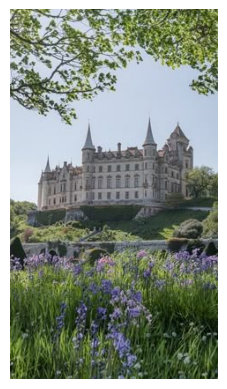

Name  /content/media/e9_ea_43e9eaae8f490d6fc1925302bd12e.jpg


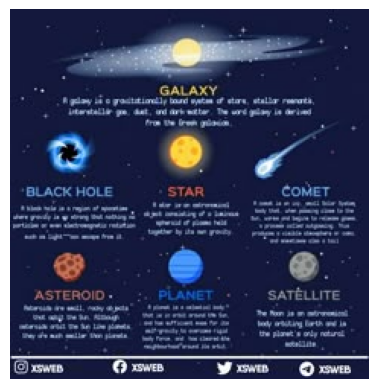

Name  /content/media/8c_f4_10_8cf410712b874f08331d283dd118d50.jpg


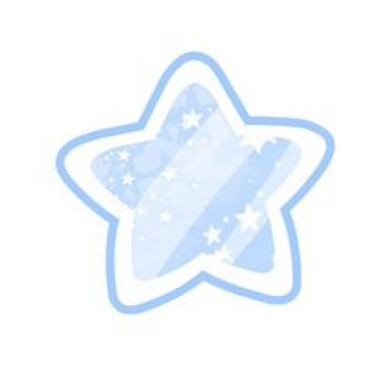

Name  /content/media/01_a4_0c_01a40cadebf5af4838c0c59f2559.jpg


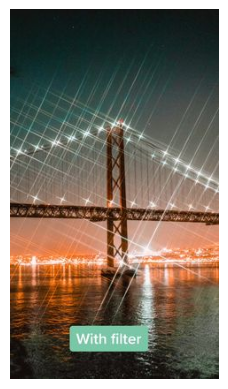

In [ ]:
directory = os.fsencode('/content/media/')
for file in os.listdir(directory):
  name = '/content/media/' + os.fsdecode(file)
  print("Name: ", name)
  img = cv2.imread(name,1)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

# Part 3: Composing Images

Tasks:

- Show how to compile multiple images in one file, using numpy to create a grid.

- After this, we can show different possible layout options, keeping in mind good mood board practices.

Along with the images themselves, how we compose them in our mood board is just as important. Numpy is a library that can help us calculate how to orient our images in a grid. OpenCV will allow us to actually read the images and paste them in our mood board.

Below we have a simple example of how to make a 2x2 grid for our images; read through the function to see how we go about placing images where we want them in our collage.

In [ ]:
# 2 x 2 grid
#From https://medium.com/@ashitkumar/image-capture-and-create-collage-opencv-4dc9e08b7c09

def make2by2():
  """
  Reading 4 images from the media folder, construct a 2x2 grid that stitches
  those images together and writes it to collage.png
  In: None
  Out: None
  """
  imgDict = {}

  maxPhotos = 4

  # from https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
  directory = os.fsencode('/content/media/')
  counter = 0
  picsLeft = len(os.listdir(directory))

  # Read in the four images
  for file in os.listdir(directory):
    if picsLeft > maxPhotos and np.random.randint(len(os.listdir(directory))) > (maxPhotos - 1):
      picsLeft = picsLeft - 1
      continue
    # Name/Index the images
    inFilename = os.fsdecode(file)
    if inFilename == ".ipynb_checkpoints":
      continue
    else:
      inFilename = '/content/media/' + inFilename
      outFilename = "img_read_sized"+str(counter)

      # Resize the images
      img_read_unsized = cv2.imread(inFilename, cv2.IMREAD_COLOR)
      imgDict[outFilename] = cv2.resize(img_read_unsized, (250, 250))
      counter = counter + 1
      picsLeft = picsLeft - 1

      #limit number of photos
      if counter > maxPhotos:
        break

  # Vertically stack up two images
  col1 = np.vstack([imgDict['img_read_sized0'], imgDict['img_read_sized2']])
  col2 = np.vstack([imgDict['img_read_sized3'], imgDict['img_read_sized1']])
  # Now horizontally put them side-by-side
  collage = np.hstack([col1, col2])# Create the collage
  cv2.imwrite("collage.png", collage)


  #keep https://www.geeksforgeeks.org/image-stitching-with-opencv/ but is likely out of our scope

make2by2()
twoBy2 = cv2.imread("collage.png")
plt.imshow(twoBy2[...,::-1])

### Crash Course in OpenCV

First, let's learn about how OpenCV represents images.

Color can be represented as a combination of red, green, and blue, where each color is valued between 0 and 255. OpenCV will store colored images as 3 matrices of values from 0-255, one for red, one for green, and one for blue. Each value in the matrices corresponds to a pixel.

*So what's hapening in this code?*

First, we read in each file in the media folder we made with our scraper. We read in the file as an image using OpenCV's **imread()** function.

Then, we make all the photos 250x250 pixels big using OpenCV's **resize()** function.

After that, we use OpenCV's **vstack()** to make 1x2 columns. The "v" in "vstack" stands for vertical--we are stacking the images vertically!

Finally, we use OpenCV's **hstack()** to glue those columns together. The "h" in "hstack" stands for horizontal--we are stacking the columns horizontally!

The very very last thing we do is use OpenCV's **imwrite()** function to save our collage as a 500x500 image.

**Your Turn: We just made a 500x500px picture. Find the line we resize images and make a 1000x100px picture instead!**

Now we can make more complicated layouts! Below is a function to make a 3x3 grid, this time with padding in between!

In [ ]:
first = True

def hex_to_rgb(hex_color):
    """
    Converts a hex color into an (r, g, b) tuple
    In: String, a 6-digit hex number representing a color
    Out: A tuple representing a color in the (r, g, b) representation
    """
    hex_color = hex_color.lstrip('#')
    if len(hex_color) != 6:
        raise ValueError("Hex color must be 6 characters long.")
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def make3x3Collage():
#def make3x3Collage(r, g, b):
    directory = '/content/media/'

    valid_exts = ('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')
    file_list = [os.path.join(directory, f) for f in os.listdir(directory)
                 if f.endswith(valid_exts)]
    file_list = file_list[:9]  # 9 images

    images = []
    for file_path in file_list:
        img = cv2.imread(file_path)
        if img is not None:
            # Resize to 200×200
            img_resized = cv2.resize(img, (200, 200))
            images.append(img_resized)

    num_images = len(images)
    if num_images < 9:
        print("Warning: Fewer than 9 images found. The collage might have empty spots.")

    spacing = 10
    cell_size = 200
    grid_size = 3 * cell_size + 2 * spacing

    # Create a black canvas
    if first:
      background_rgb = (255, 255, 255)
    # shape = (height, width, channels)
    else:
      hex_color = input('What color background would you like between each image? (enter a hex value)')
      # Convert hex to RGB
      try:
          background_rgb = hex_to_rgb(hex_color)
      except ValueError as e:
          print(f"Invalid hex color. Using black instead. ({e})")
          background_rgb = (0, 0, 0)

    collage = np.zeros((grid_size, grid_size, 3), dtype=np.uint8)
    collage[:] = background_rgb

    for i, img in enumerate(images):
        row = i // 3
        col = i % 3
        y = row * (cell_size + spacing)
        x = col * (cell_size + spacing)

        collage[y:y+cell_size, x:x+cell_size] = img

    cv2.imwrite("collage.png", collage)
    collage = cv2.imread("collage.png")
    print("Collage saved as collage.png")
    return collage

make3x3Collage()
makeBrady = cv2.imread("collage.png")
plt.imshow(makeBrady[...,::-1])

*Whoah, that image selection looks different than last time*

We check for a list of valid path extensions with valid_exts. The first function used NOT ".ipynb_checkpoints" to get rid of the same invalid extension problem!

The first time, we priortized randomness--we used random number generation to decide whether we used or skipped images. You'll see that code reused in our last function (because the same person wrote it). This time, we take the first 9 images and quickly move into processing our images. We also have a quick cheker that makes sure we have 9 images in the folder we're drawing from! After pulling our images in, we resize them to 200x200 pixel images, similar to our 2x2 example.

*Background color???*

We take a hex color, where every two digits correspond to the 0-255 value of red, green, then blue. We will get more into how this conversion works later! We make a big matrix of zeroes whose size is calculated by the size of each image (200 px across) and the spacing we want (10px between each image).Then, we replace the zeros in our matrix to our RGB color.

*How did we get that padding?*

Now we have a canvas of just one color! We can now go through and place our images on top of that canvas by replacing the pixels of that canvas with the corresponding pixels of our images. Placing our images takes a little bit of math to calculate the coordinates of the top left corner of the image. Those calculations consider our padding to space out our image placement appropriately! Replacing the image takes the corner coordinate, height, and width (height before width).


Now let's play with some overlap!

In [ ]:
# Overlapping Collage

def overlapping5(r,g,b):
    """
    Given background color values, form a collage in overlapping format using images from media folder
    In: r,g,b = integers red,green,blue color values
    Out: The collage containing 5 images in an overlapping pattern
    """
    # Make the canvas the chosen color and size
    Hcanv = 1100
    Wcanv = 1300

    canvas = np.ones([Hcanv,Wcanv,3])
    colors = [b,g,r]

    for c in range(3):
      canvas[:,:,c] *= colors[c]

    # Constants needed for reading/resizing images
    imgDict = {}
    counter = 0
    Himg = 600
    Wimg = 300
    directory = os.fsencode('/content/media/')

    # read in 5 random images from directory
    for file in os.listdir(directory):
      if random.random() < 0.5:
        continue
      inFilename = os.fsdecode(file)
      if inFilename == ".ipynb_checkpoints":
        continue
      else:
        inFilename = '/content/media/' + inFilename
        outFilename = "img_read_sized"+str(counter)
        img_read_unsized = cv2.imread(inFilename, cv2.IMREAD_COLOR)
        imgDict[outFilename] = cv2.resize(img_read_unsized, (Wimg, Himg))

      counter += 1
      if counter > 4:
        break

    # add images to canvas
    startY = 100
    startX = 100

    canvas[startY:startY+Himg,startX:startX+Wimg,:] = imgDict['img_read_sized0']
    canvas[startY+(Himg//2):startY+(Himg//2)+Himg,startX+Wimg-100:startX+Wimg-100+Wimg,:] = imgDict['img_read_sized1']
    canvas[startY:startY+Himg,startX+2*(Wimg-100):startX+2*(Wimg-100)+Wimg,:] = imgDict['img_read_sized2']
    canvas[startY+(Himg//2):startY+(Himg//2)+Himg,startX+3*(Wimg-100):startX+3*(Wimg-100)+Wimg,:] = imgDict['img_read_sized3']
    canvas[startY:startY+Himg,startX+4*(Wimg-100):startX+4*(Wimg-100)+Wimg,:] = imgDict['img_read_sized4']

    cv2.imwrite("collage.png", canvas)
    collage = cv2.imread("collage.png")
    return collage

overlapping5(255, 255, 255)
stairs = cv2.imread("collage.png")
plt.imshow(stairs[...,::-1])

*So now what's happening?*

We make our canvas out of an 3 arrays of ones then replace each array with red, green, or blue. This function brings back randomization with a 50% chance of choosing a given image. Then, we resize each image to 300x600px and save it to a dictionary so we can easily access them later.

*Okay, but I want to know about the __overlap__*

Fair enough! This part actually isn't too different from the previous function in that we replace parts of the canvas with an image using the top left coordinate, the width, and the height of the image we're adding. The only difference is that we're calculating the top left corner to be in a place that overlaps with an image that's previously been added. Replacing those pixels will make it look like the new image is on top of the old image. We can just move from left to right and organize them as desired.

Now, display an *asymmetrical* 3x3 grid.

In [ ]:
# 9-Picture Collage with one big one in the middle
# 10/10 function naming :')

from google.colab.patches import cv2_imshow

def make9PicBigMiddle(red, green, blue):
  """
  Takes 9 images from the media folder and arranges them into a collage style
  where the middle picture is largest. Writes image to collage.png
  In: red, green, blue representing a color in RGB colorspace. Each argument
  should be an integer between 0 and 255.
  Out: None
  """
  imgDict = {}

  maxPhotos = 9

  # from https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
  #download images
  directory = os.fsencode('/content/media/')
  counter = 0
  picsLeft = len(os.listdir(directory))

  for file in os.listdir(directory):
    # print("PicsLeft: "+str(picsLeft)+"\ncounter: "+str(counter))
    if picsLeft > maxPhotos and np.random.randint(len(os.listdir(directory))) > (maxPhotos - 1):
      picsLeft = picsLeft - 1
      continue

    inFilename = os.fsdecode(file)
    if inFilename == ".ipynb_checkpoints":
      continue
    else:
      inFilename = '/content/media/' + inFilename
      outFilename = "img_read_sized"+str(counter)
      img_read_unsized = cv2.imread(inFilename, cv2.IMREAD_COLOR)
      if counter < 4:
        imgDict[outFilename] = cv2.resize(img_read_unsized, (400, 400))
      elif counter < 6:
        imgDict[outFilename] = cv2.resize(img_read_unsized, (800, 800))
        imgDict[outFilename] = imgDict[outFilename][200:600, 0:800]
      elif counter < 8:
        imgDict[outFilename] = cv2.resize(img_read_unsized, (800, 800))
        imgDict[outFilename] = imgDict[outFilename][0:800, 200:600]
      else:
        imgDict[outFilename] = cv2.resize(img_read_unsized, (800, 800))
      counter = counter + 1
      picsLeft = picsLeft - 1

      #limit number of photos
      if counter > maxPhotos:
        break

  #make big canvas
  canvas = np.ones([1700,1700,3],dtype = np.uint8)
  canvas[:,:,0] = canvas[:,:,0] * blue
  canvas[:,:,1] = canvas[:,:,1] * green
  canvas[:,:,2] = canvas[:,:,2] * red

  #paste images
  canvas[0:400, 450:850,:] = imgDict['img_read_sized0']
  canvas[850:1250,0:400,:] = imgDict['img_read_sized1']
  canvas[1300:1700, 850:1250,:] = imgDict['img_read_sized2']
  canvas[450:850, 1300:1700,:] = imgDict['img_read_sized3']
  canvas[0:400, 900:1700,:] = imgDict['img_read_sized4']
  canvas[1300:1700,0:800,:] = imgDict['img_read_sized5']
  canvas[900:1700,1300:1700,:] = imgDict['img_read_sized6']
  canvas[0:800,0:400,:] = imgDict['img_read_sized7']
  canvas[450:1250,450:1250,:] = imgDict['img_read_sized8']
  cv2.imwrite("collage.png", canvas)

make9PicBigMiddle(255, 255, 255)
make9 = cv2.imread("collage.png")
plt.imshow(make9[...,::-1])


*Now what's happening?!*

Although this might look a little fancier, the concept is the same! We randomize which images we select in the same way we did for the 2x2 grid. This time when we save them, we save some as different sizes. We have two tall images, two wide images, four small squares, and one big square.

Then, we make a large canvas just like for the previous functions and place our images on top of the canvas in the exact same way! This one took some planning with graph paper, but the idea is no different from our previous functions!


### Actually Make Collage

Allows for background color choosing!

Pick one format below:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcollage-maker.com%2Fwp-content%2Fuploads%2F9-picture-photo-collage.png&f=1&nofb=1&ipt=9272224cef005d6eb03064fbb5a9cac5fe788d7b74fccee688ad2dc5b80a3ec5&ipo=images" height=200px>
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.freepik.com%2Ffree-psd%2Fcollage-photo-effect_23-2151228647.jpg&f=1&nofb=1&ipt=76104f2ef6e1eb842d9b014991a8c979fc90d829166fa8fa707cbebeb4080677&ipo=images" height=200px>
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F2.bp.blogspot.com%2F-LG-vHbuqHbQ%2FVOQf1y9ZmdI%2FAAAAAAAARR4%2FSKn98fsoKmI%2Fs1600%2FThe_Brady_Bunch_Movie_wallpapers_21528.jpg&f=1&nofb=1&ipt=346ec7fb147016ad2e9a39d8d13d1ef2637e31e269ad3d41418761b335772e47&ipo=images" height=200px>
<br>
<p>Big Middle, Overlapping, or Brady Bunch</p>
<p>Sources: <a href="https://collage-maker.com/photo-collage-maker/">Collage-Maker</a>, <a href="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.freepik.com%2Ffree-psd%2Fcollage-photo-effect_23-2151228647.jpg&f=1&nofb=1&ipt=aa671036ce9bc335e140f95da81ebe3e5404c8f47deca0c4838db8cb4628eec3">Info Update </a>, and <a href="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcollage-maker.com%2Fwp-content%2Fuploads%2F9-picture-photo-collage.png&f=1&nofb=1&ipt=9272224cef005d6eb03064fbb5a9cac5fe788d7b74fccee688ad2dc5b80a3ec5&ipo=images"> Background Wallpaper </a> </p>

<img src = "https://proactivecreative.com/wp-content/uploads/2022/10/pastel-color-palette-featured.jpg" height=300px>
<p> Source: <a href="https://proactivecreative.com/pastel-color-palette/">Proactive Creative</a> </p>

**Choose a Background**

We ask for a hex color input! What is hex? Hex is a base-16 way of representing numbers, so instead of digits going from 0-9 (base-10), they go from 0-F. Remember that colors can be represented as a red value, green value, and blue value, each ranging from 0-255. We can write this in hex as two digits per color value! So, Warm Berry #85586F has a red value of 85 in hex (133 in base 10), a green value of 58 in hex (88 in base 10), and a blue value of 6F in hex (111 in base 10).

**Check Understanding: If (255, 255, 255) is white in RGB, what is its hex value?**

#### How do we know which layout to choose?

Each format can have differnt purposes depending on the concept you want to represent with your mood board!

**Big Middle:**
People tend to look in the center of an image first, so the center image will likely be the focus in all of these formats. However, the format with the enlarged middle will likely keep the audience's attention in the middle.


**Overlapping:** This collage type does not have much variation in the height or size of each image, so there won't be one focal point a viewer's eye is drawn in first. For Western audiences, a viewer would naturally take in each image one at a time from left to right, which we take advantage of when choosing the order of how each image overlaps. This layout may be a good strategy if your mood board has a more progressive or narrative concept.

**Brady Bunch:**
The Brady Bunch format does not direct the viewers attention as deliberately because every box is equally sized and spaced apart. Western audiences will likely look at images from top to bottom and from left to right because that is the way they are taught to read.

#### How do we know which background color to choose?

We included a variety of hex codes for different pastel colors, why is that?

One important part of a mood board is keeping in mind what color pallette you want to use. This can be monochromatic, a variety of colors with similar brightness/saturation, or even just colors that you just think look good together!

Your images should align with your chosen color pallette, and so should your background color. We listed pastel backgrounds since in general, it is best to have a lighter or neutral background to not distract from your images. However, feel free to experiment! If you feel that a neon color will align more with your energetic mood board, input its hex color and see if you are happy with the result. :)

In [ ]:
collageFormat = input("Choose your collage format (options in text block above): ")

if collageFormat.lower()[:2] == "bi":
  color_code = input("Enter a hex color: #")
  hex_color = hex_color.lstrip('#')
  if len(hex_color) != 6:
      raise ValueError("Hex color must be 6 characters long.")
  color_code = str(color_code)

  # convert hex to rgb
  red = int(color_code[0:2], 16)
  green = int(color_code[2:4], 16)
  blue = int(color_code[4:6], 16)

  make9PicBigMiddle(red, green, blue)

  # display image
  collage = cv2.imread("collage.png")
  plt.axis('off')
  plt.imshow(collage[...,::-1])

elif collageFormat.lower()[:2] == "ov":
  valid = False
  while not valid:
    color_code = input("Enter a hex color")
    try:
      # convert hex to rgb
      red = int(color_code[0:2], 16)
      green = int(color_code[2:4], 16)
      blue = int(color_code[4:6], 16)
      valid = True
    except:
      print("Please enter a valid hex value.")
      continue

  #display image
  plt.axis('off')
  plt.imshow(overlapping5(red, green, blue)[...,::-1])

elif collageFormat.lower()[:2] == "br":
  first = False
  make3x3Collage()

  #display image
  collage = cv2.imread("collage.png")
  plt.axis('off')
  plt.imshow(collage[...,::-1])
else:
  print("Invalid input")



# Part 4: Filters!

Tasks:

- Give the user three options: angsty, moody, joyful

- Translate those moods into a filter:
    * Angsty: High contrast, enhance reds
    * Moody: Decrease contrast, decrease saturation
    * Joyful: Increase contrast, increase brightness

- We can play around with these filters as we create the tutorial to see which options most clearly relay the mood.


The implementation of the filters involves a few different steps. Firstly, we use the call "cv2.COLOR_RGB2HSV" to convert each pixel from a RGB (red, green, blue) colorscheme to a HSV (Hue Saturation Value Space) colorscheme. This allows us to manipulate the hue of each pixel by multiplying and dividing the hue to associate properly with the desired mood. The reason for using "math" to manipulate the hue of each image is because the program stores the images as a matrix with each value associated with the corresponding hue for that pixel. By storing an image as a matrix, it allows for quick computation and gets our filter applied quickly! Finally, we convert from HSV back to RGB so that our image can be displayed.


**Filter Implementation**

Angsty

* We use addWeighted to scale contrast by 2 and subtract 100 (out of 255) from brightness. addWeighted also can overlay two images, so we overlay our initial image with an empty image (np.zeros)

* Our image is saved as a BGR file (Blue, Green, Red), so we index the red layer with (index 2) with angsty[:,:,2], then we double to value of red to enhance the red. Note that images are saved as 3 color layers that are added to give us color.

Moody

* We convert to a Hue Saturation Value file and index saturation with moody[:,:,1]. We then halve the saturation and convert back to a BGR file. We then lower brightness by 5 while keeping contrast at 1 using addWeighted again. HSV, like BGR, is just another colorspace for representing color in 3 layers.

Joyful

* Like with angsty and moody, we use addWeighted to increase both contrast and brightness.

In [ ]:
# Following https://www.geeksforgeeks.org/image-enhancement-techniques-using-opencv-python/
# referenced https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html

collage = cv2.imread("collage.png")
filter = input("Enter image option: angsty, moody, joyful, or none: ")
if filter == "":
  # prevents indexing error by catching empty string case, displays image without changes
  plt.axis('off')
  plt.imshow(collage[...,::-1])

elif filter.lower()[0] == 'a':
  # increase contrast, decrease brightness
  contrast = 2
  brightness = -100
  angsty = cv2.addWeighted(collage, contrast, np.zeros(collage.shape, collage.dtype), 0, brightness)

  # increase red value
  angsty[:, :, 2] = angsty[:, :, 2]*2

  #display image
  plt.axis('off')
  plt.imshow(angsty[...,::-1])

elif filter.lower()[0] == 'm':
  #decrease saturation by converting to HSV colorspace and back
  moody = cv2.cvtColor(collage, cv2.COLOR_RGB2HSV)
  moody[:, :, 1] = moody[:, :, 1] * .5
  moody = cv2.cvtColor(moody, cv2.COLOR_HSV2BGR)

  #lower brightness, keep contrast the same
  contrast = 1
  brightness = -5
  moody = cv2.addWeighted(moody, contrast, np.zeros(moody.shape, moody.dtype), 0, brightness)

  #display image
  plt.axis('off')
  plt.imshow(moody)

elif filter.lower()[0] == 'j':
  #increase both contrast and brightness
  contrast = 2
  brightness = 8
  joy = cv2.addWeighted(collage, contrast, np.zeros(collage.shape, collage.dtype), 0, brightness)

  #display image
  plt.axis('off')
  plt.imshow(joy[...,::-1])

else:
  #indexing fix https://stackoverflow.com/questions/50630825/matplotlib-imshow-distorting-colors
  plt.axis('off')
  plt.imshow(collage[...,::-1])


**Your Turn: Amplify the green in the angsty filter, lower contrast in the moody filter, and increase the brightness in the joyful filter**

**Now adjust the values to your liking! (This can mean reverting your changes and tweaking something else)**

# Part 5: So What Have We Done?

We have done a lot so far in this tutorial.

Parts 1 and 2 focused on how we can actually get images from Pinterest, while Parts 3 and 4 taught how we can compose these images in our mood board and apply different filters to them as appropriate. Now that you have completed the tutorial, you should have a grasp on how to scrape data (ethically), how selenium works (as a webpage that imitates a user so as not to arouse any suspicions from pinterest), how to use openCV to compose these images, and how to manipulate the saturation and color of each pixel in your images to apply a filter. If you are interested, you are welcome to copy this program and add changes, like a different image layout for the moodboard. we hope that this tutorial was helpful and informative and that you enjopyed learning about how to create moodboards!

### Further Exploration

If you would like to do some furthur exploration on topics we talked about here, check out the links below!

- Pinterest API (for larger or more serious projects)

  https://developers.pinterest.com/docs/api/v5/introduction

- Selenium Documentation (for some more ETHICAL scraping):

  https://www.selenium.dev/documentation/webdriver/getting_started/

- BeautifulSoup (a library we didn't use which can parse HTML):

  https://www.crummy.com/software/BeautifulSoup/bs4/doc/

- OpenCV (if you are interested in more complex image manipulation):

  https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

- Articles on Moodboard Creation

  https://www.masterclass.com/articles/how-to-make-a-moodboard-step-by-step-guide

  https://www.studiobinder.com/blog/how-to-make-a-mood-board/


